In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('Breast_cancer_data.csv')

In [3]:
data.head(5)

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


<AxesSubplot:>

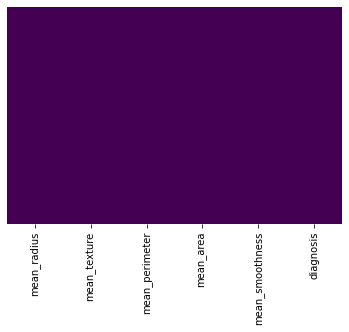

In [4]:
# Check if we have any null Data in the data set
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

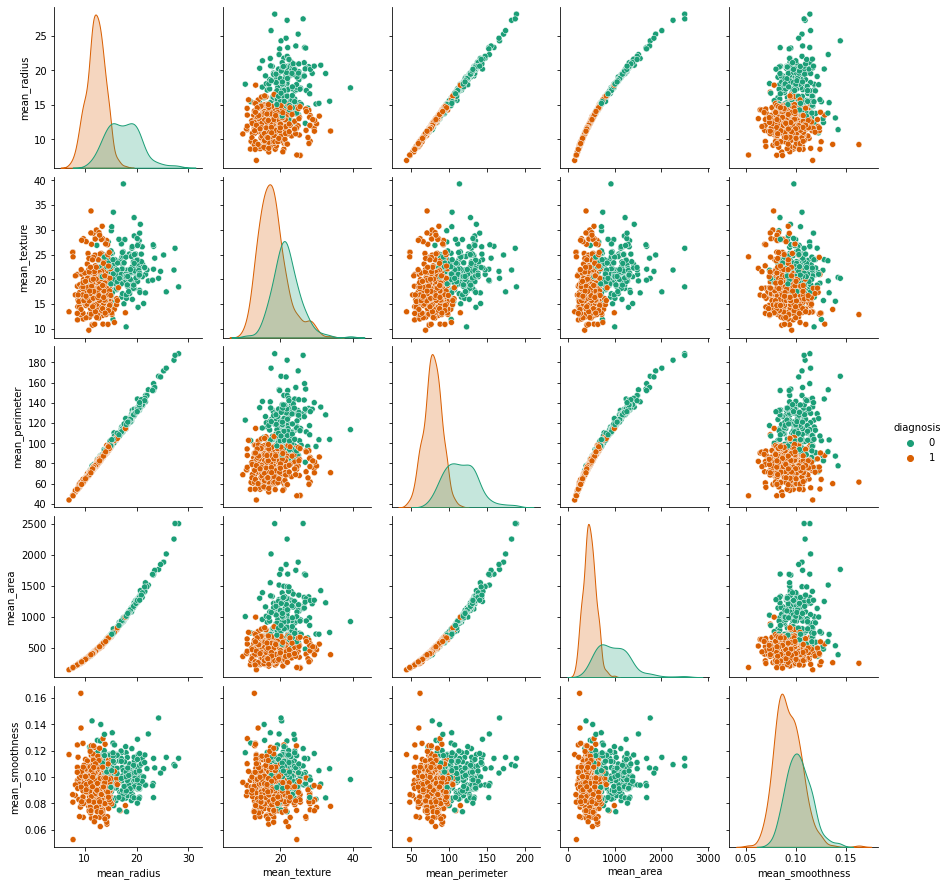

In [5]:
# Check if the target is separable.
sns.pairplot(data,hue='diagnosis',palette='Dark2')

<AxesSubplot:xlabel='diagnosis', ylabel='count'>

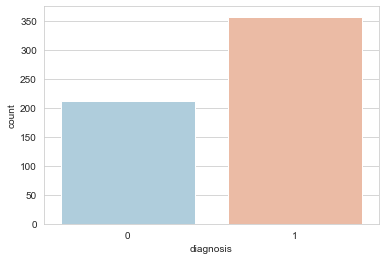

In [6]:
sns.set_style('whitegrid')
sns.countplot(x='diagnosis',data=data,palette='RdBu_r')

In [7]:
from sklearn.model_selection import train_test_split

X = data.drop('diagnosis',axis=1)
y = data['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.84      0.85      0.84        66
           1       0.90      0.90      0.90       105

    accuracy                           0.88       171
   macro avg       0.87      0.87      0.87       171
weighted avg       0.88      0.88      0.88       171

------------------------------------------------------------------
Confusion Matrix:
[[56 10]
 [11 94]]
------------------------------------------------------------------
Accuracy: 0.8771929824561403
------------------------------------------------------------------
roc_auc_score for DecisionTree:  0.8718614718614718


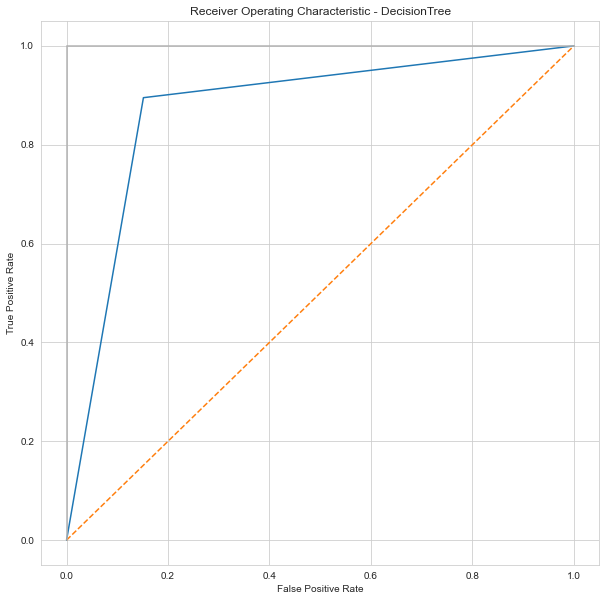

In [8]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
predictions = dtree.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print('------------------------------------------------------------------')
print(classification_report(y_test,predictions))
print('------------------------------------------------------------------')
print('Confusion Matrix:')
print(confusion_matrix(y_test,predictions))
print('------------------------------------------------------------------')
from sklearn.metrics import accuracy_score
print('Accuracy:',accuracy_score(y_test, predictions))
print('------------------------------------------------------------------')

from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
y_score1 = dtree.predict_proba(X_test)[:,1]
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_score1)
print('roc_auc_score for DecisionTree: ', roc_auc_score(y_test, y_score1))
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - DecisionTree')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Criterion=gini 0.8771929824561403
Criterion=entropy 0.8888888888888888


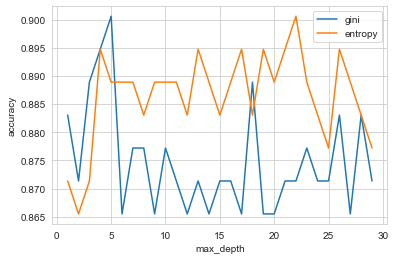

In [9]:
dtree = DecisionTreeClassifier(criterion='gini')
dtree.fit(X_train, y_train)
pred = dtree.predict(X_test)
print('Criterion=gini', accuracy_score(y_test, pred))
dtree = DecisionTreeClassifier(criterion='entropy')
dtree.fit(X_train, y_train)
pred = dtree.predict(X_test)
print('Criterion=entropy', accuracy_score(y_test, pred))

max_depth = []
acc_gini = []
acc_entropy = []
for i in range(1,30):
 dtree = DecisionTreeClassifier(criterion='gini', max_depth=i)
 dtree.fit(X_train, y_train)
 pred = dtree.predict(X_test)
 acc_gini.append(accuracy_score(y_test, pred))
 ####
 dtree = DecisionTreeClassifier(criterion='entropy', max_depth=i)
 dtree.fit(X_train, y_train)
 pred = dtree.predict(X_test)
 acc_entropy.append(accuracy_score(y_test, pred))
 ####
 max_depth.append(i)
d = pd.DataFrame({'acc_gini':pd.Series(acc_gini), 
 'acc_entropy':pd.Series(acc_entropy),
 'max_depth':pd.Series(max_depth)})
# visualizing changes in parameters
plt.plot('max_depth','acc_gini', data=d, label='gini')
plt.plot('max_depth','acc_entropy', data=d, label='entropy')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.legend()

------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.82      0.88      0.85        66
           1       0.92      0.88      0.90       105

    accuracy                           0.88       171
   macro avg       0.87      0.88      0.87       171
weighted avg       0.88      0.88      0.88       171

------------------------------------------------------------------
Confusion Matrix:
[[58  8]
 [13 92]]
------------------------------------------------------------------
Accuracy: 0.8771929824561403
------------------------------------------------------------------
roc_auc_score for DecisionTree(depth = 7 & criterion = entropy):  0.8774891774891774


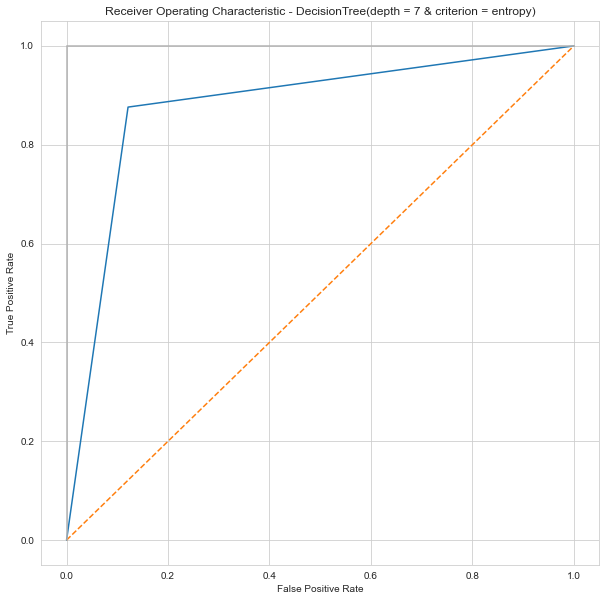

In [10]:
dtree = DecisionTreeClassifier(criterion='entropy', max_depth=23)
dtree.fit(X_train, y_train)
predictions = dtree.predict(X_test)

from sklearn.metrics import classification_report,confusion_matrix
print('------------------------------------------------------------------')
print(classification_report(y_test,predictions))
print('------------------------------------------------------------------')
print('Confusion Matrix:')
print(confusion_matrix(y_test,predictions))
print('------------------------------------------------------------------')
from sklearn.metrics import accuracy_score
print('Accuracy:',accuracy_score(y_test, predictions))
print('------------------------------------------------------------------')

from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
y_score1 = dtree.predict_proba(X_test)[:,1]
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_score1)
print('roc_auc_score for DecisionTree(depth = 7 & criterion = entropy): ', roc_auc_score(y_test, y_score1))
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - DecisionTree(depth = 7 & criterion = entropy)')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.86      0.77      0.82        66
           1       0.87      0.92      0.89       105

    accuracy                           0.87       171
   macro avg       0.87      0.85      0.86       171
weighted avg       0.87      0.87      0.86       171

------------------------------------------------------------------
Confusion Matrix:
[[51 15]
 [ 8 97]]
------------------------------------------------------------------
Accuracy: 0.8654970760233918
------------------------------------------------------------------
roc_auc_score for KNeighborsClassifier:  0.8482683982683983


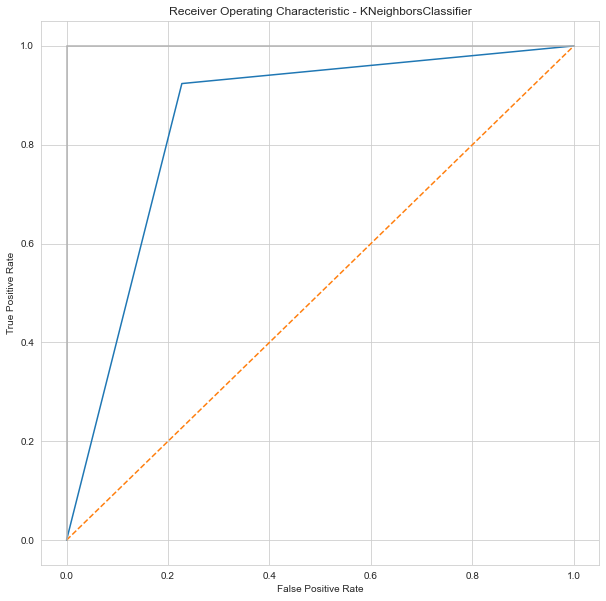

In [11]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
 

predictions = knn.predict(X_test) 
from sklearn.metrics import classification_report,confusion_matrix
print('------------------------------------------------------------------')
print(classification_report(y_test,predictions))
print('------------------------------------------------------------------')
print('Confusion Matrix:')
print(confusion_matrix(y_test,predictions))
print('------------------------------------------------------------------')
from sklearn.metrics import accuracy_score
print('Accuracy:',accuracy_score(y_test, predictions))
print('------------------------------------------------------------------')

from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
y_score1 = knn.predict_proba(X_test)[:,1]
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_score1)
print('roc_auc_score for KNeighborsClassifier: ', roc_auc_score(y_test, y_score1))
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - KNeighborsClassifier')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Text(0, 0.5, 'Error Rate')

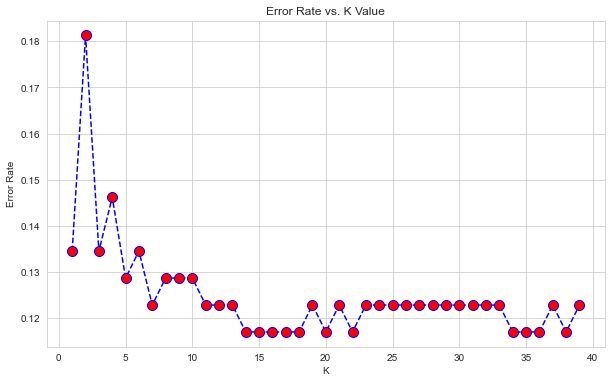

In [12]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.94      0.74      0.83        66
           1       0.86      0.97      0.91       105

    accuracy                           0.88       171
   macro avg       0.90      0.86      0.87       171
weighted avg       0.89      0.88      0.88       171

------------------------------------------------------------------
Confusion Matrix:
[[ 49  17]
 [  3 102]]
------------------------------------------------------------------
Accuracy: 0.8830409356725146
------------------------------------------------------------------
roc_auc_score for KNeighborsClassifier (N = 15):  0.911976911976912


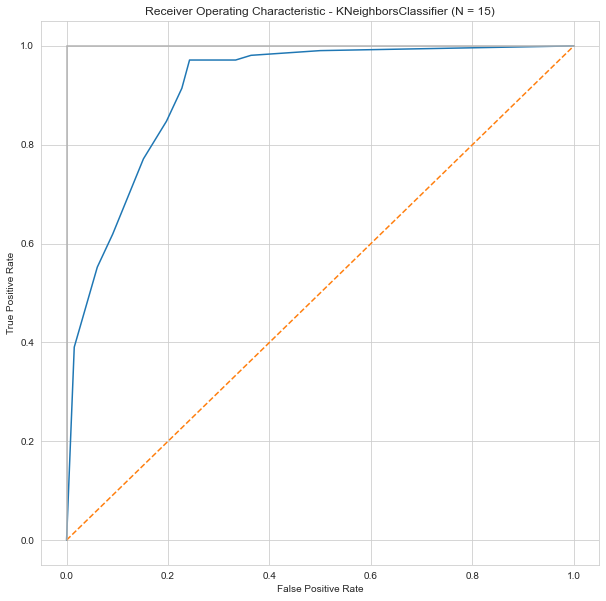

In [13]:
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train,y_train)
predictions = knn.predict(X_test) 
from sklearn.metrics import classification_report,confusion_matrix
print('------------------------------------------------------------------')
print(classification_report(y_test,predictions))
print('------------------------------------------------------------------')
print('Confusion Matrix:')
print(confusion_matrix(y_test,predictions))
print('------------------------------------------------------------------')
from sklearn.metrics import accuracy_score
print('Accuracy:',accuracy_score(y_test, predictions))
print('------------------------------------------------------------------')

from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
y_score1 = knn.predict_proba(X_test)[:,1]
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_score1)
print('roc_auc_score for KNeighborsClassifier (N = 15): ', roc_auc_score(y_test, y_score1))
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - KNeighborsClassifier (N = 15)')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.94      0.74      0.83        66
           1       0.86      0.97      0.91       105

    accuracy                           0.88       171
   macro avg       0.90      0.86      0.87       171
weighted avg       0.89      0.88      0.88       171

------------------------------------------------------------------
Confusion Matrix:
[[ 49  17]
 [  3 102]]
------------------------------------------------------------------
Accuracy: 0.8830409356725146
------------------------------------------------------------------
roc_auc_score for svm (kernel = rbf):  0.9285714285714286


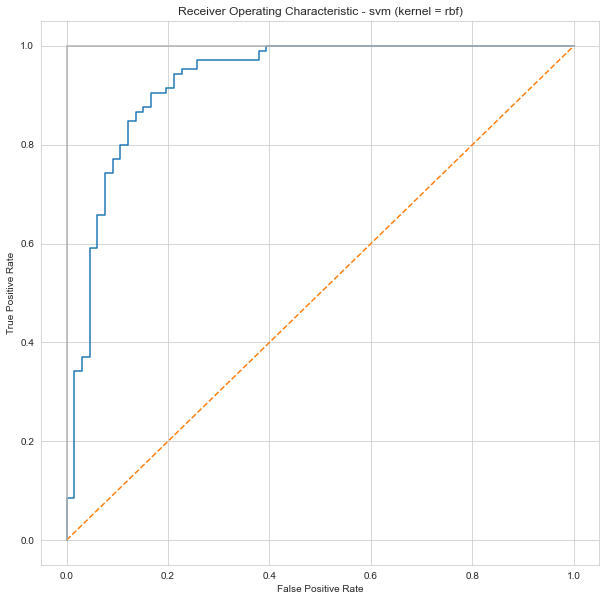

In [14]:
from sklearn.svm import SVC
svc_model = SVC(kernel='rbf',probability=True)
svc_model.fit(X_train,y_train)
predictions = svc_model.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print('------------------------------------------------------------------')
print(classification_report(y_test,predictions))
print('------------------------------------------------------------------')
print('Confusion Matrix:')
print(confusion_matrix(y_test,predictions))
print('------------------------------------------------------------------')
from sklearn.metrics import accuracy_score
print('Accuracy:',accuracy_score(y_test, predictions))
print('------------------------------------------------------------------')

from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
y_score1 = svc_model.predict_proba(X_test)[:,1]
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_score1)
print('roc_auc_score for svm (kernel = rbf): ', roc_auc_score(y_test, y_score1))
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - svm (kernel = rbf)')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [15]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
# svc_model = SVC(kernel='sigmoid',probability=True)
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001]} 
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ...........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ................................. C=1, gamma=0.001, total=   0.0s
[CV] C=10, gamma=1 ...................................................
[CV] .................................... C=10, gamma=1, total=   0.0s
[CV] C=10, gamma=1 ...................................................
[CV] .................................... C=10, gamma=1, total=   0.0s
[CV] C=10, gamma=1 ...................................................
[CV] .................................... C=10, gamma=1, total=   0.0s
[CV] C=10, gamma=1 ...................................................
[CV] .................................... C=10, gamma=1, total=   0.0s
[CV] C=10, gamma=1 ...................................................
[CV] .................................... C=10, gamma=1, total=   0.0s
[CV] C=10, gamma=0.1 .................................................
[CV] .................................. C=10, gamma=0.1, total=   0.0s
[CV] C=10, gamma=0.1 .................................................
[CV] .

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.4s finished


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001]},
             verbose=2)

------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.07      0.06      0.07        66
           1       0.47      0.52      0.50       105

    accuracy                           0.35       171
   macro avg       0.27      0.29      0.28       171
weighted avg       0.32      0.35      0.33       171

------------------------------------------------------------------
Confusion Matrix:
[[ 4 62]
 [50 55]]
------------------------------------------------------------------
Accuracy: 0.34502923976608185
------------------------------------------------------------------
roc_auc_score for svm (kernel = sigmoid):  0.9030303030303031


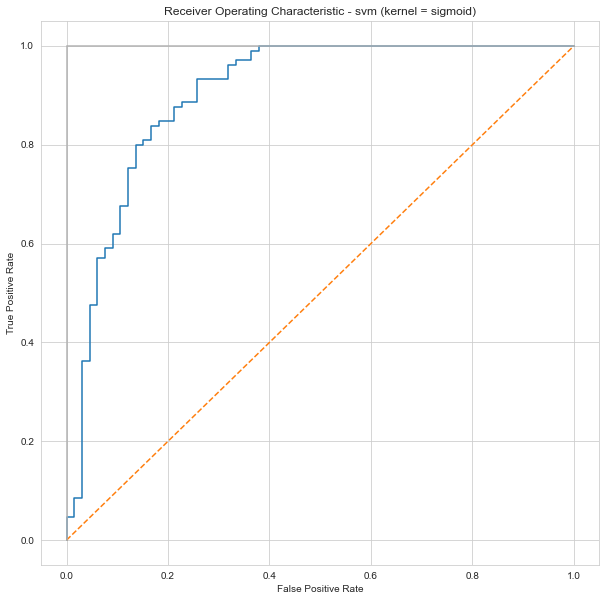

------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.89      0.76      0.82        66
           1       0.86      0.94      0.90       105

    accuracy                           0.87       171
   macro avg       0.88      0.85      0.86       171
weighted avg       0.87      0.87      0.87       171

------------------------------------------------------------------
Confusion Matrix:
[[50 16]
 [ 6 99]]
------------------------------------------------------------------
Accuracy: 0.8713450292397661
------------------------------------------------------------------


In [16]:
from sklearn.svm import SVC
svc_model = SVC(kernel='sigmoid',probability=True)
svc_model.fit(X_train,y_train)
predictions = svc_model.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print('------------------------------------------------------------------')
print(classification_report(y_test,predictions))
print('------------------------------------------------------------------')
print('Confusion Matrix:')
print(confusion_matrix(y_test,predictions))
print('------------------------------------------------------------------')
from sklearn.metrics import accuracy_score
print('Accuracy:',accuracy_score(y_test, predictions))
print('------------------------------------------------------------------')

from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
y_score1 = svc_model.predict_proba(X_test)[:,1]
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_score1)
print('roc_auc_score for svm (kernel = sigmoid): ', roc_auc_score(y_test, y_score1))
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - svm (kernel = sigmoid)')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

grid_predictions = grid.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print('------------------------------------------------------------------')
print(classification_report(y_test,grid_predictions))
print('------------------------------------------------------------------')
print('Confusion Matrix:')
print(confusion_matrix(y_test,grid_predictions))
print('------------------------------------------------------------------')
from sklearn.metrics import accuracy_score
print('Accuracy:',accuracy_score(y_test, grid_predictions))
print('------------------------------------------------------------------')


In [17]:
from sklearn.ensemble import GradientBoostingClassifier
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]
for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=2, 
                                        max_depth=2, random_state=0)
    gb_clf.fit(X_train, y_train)
    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb_clf.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(X_test, y_test)))

Learning rate:  0.05
Accuracy score (training): 0.927
Accuracy score (validation): 0.877
Learning rate:  0.075
Accuracy score (training): 0.927
Accuracy score (validation): 0.883
Learning rate:  0.1
Accuracy score (training): 0.945
Accuracy score (validation): 0.883
Learning rate:  0.25
Accuracy score (training): 0.965
Accuracy score (validation): 0.924
Learning rate:  0.5
Accuracy score (training): 0.982
Accuracy score (validation): 0.883
Learning rate:  0.75
Accuracy score (training): 0.992
Accuracy score (validation): 0.889
Learning rate:  1
Accuracy score (training): 1.000
Accuracy score (validation): 0.889


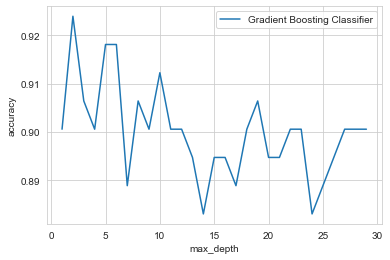

In [18]:
max_depth = []
acc = []

for i in range(1,30):
 dtree = GradientBoostingClassifier(n_estimators=20, learning_rate=0.25, max_features=2, max_depth=i, random_state=0)
 dtree.fit(X_train, y_train)
 pred = dtree.predict(X_test)
 acc.append(accuracy_score(y_test, pred))

 ####
 max_depth.append(i)
d = pd.DataFrame({'acc':pd.Series(acc),
 'acc':pd.Series(acc),
 'max_depth':pd.Series(max_depth)})
# visualizing changes in parameters

plt.plot('max_depth','acc', data=d, label='Gradient Boosting Classifier')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.legend()

------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.91      0.89      0.90        66
           1       0.93      0.94      0.94       105

    accuracy                           0.92       171
   macro avg       0.92      0.92      0.92       171
weighted avg       0.92      0.92      0.92       171

------------------------------------------------------------------
Confusion Matrix:
[[59  7]
 [ 6 99]]
------------------------------------------------------------------
Accuracy: 0.9239766081871345
------------------------------------------------------------------
roc_auc_score for GradientBoostingClassifier:  0.9635642135642135


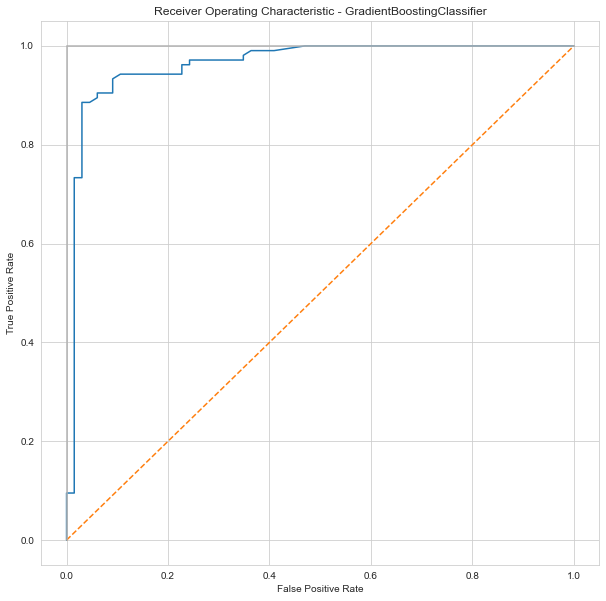

In [19]:
gb_clf2 = GradientBoostingClassifier(n_estimators=20, learning_rate=0.25, max_features=2, max_depth=2, random_state=0)
gb_clf2.fit(X_train, y_train)
predictions = gb_clf2.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print('------------------------------------------------------------------')
print(classification_report(y_test,predictions))
print('------------------------------------------------------------------')
print('Confusion Matrix:')
print(confusion_matrix(y_test,predictions))
print('------------------------------------------------------------------')
from sklearn.metrics import accuracy_score
print('Accuracy:',accuracy_score(y_test, predictions))
print('------------------------------------------------------------------')

from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
y_score1 = gb_clf2.predict_proba(X_test)[:,1]
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_score1)
print('roc_auc_score for GradientBoostingClassifier: ', roc_auc_score(y_test, y_score1))
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - GradientBoostingClassifier')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.84      0.82      0.83        66
           1       0.89      0.90      0.90       105

    accuracy                           0.87       171
   macro avg       0.87      0.86      0.86       171
weighted avg       0.87      0.87      0.87       171

------------------------------------------------------------------
Confusion Matrix:
[[54 12]
 [10 95]]
------------------------------------------------------------------
Accuracy: 0.8713450292397661
------------------------------------------------------------------
roc_auc_score for MLPClassifier:  0.9295815295815295


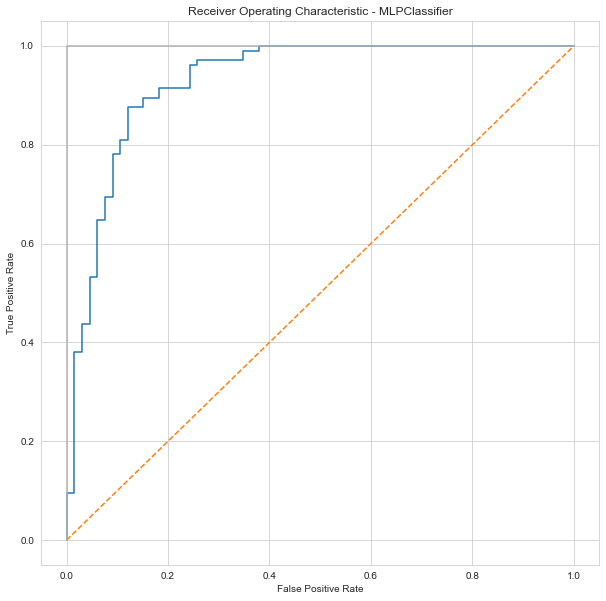

In [20]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(150,100,50), max_iter=300,activation = 'relu',solver='adam',random_state=1)
mlp.fit(X_train, y_train)
predictions = mlp.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print('------------------------------------------------------------------')
print(classification_report(y_test,predictions))
print('------------------------------------------------------------------')
print('Confusion Matrix:')
print(confusion_matrix(y_test,predictions))
print('------------------------------------------------------------------')
from sklearn.metrics import accuracy_score
print('Accuracy:',accuracy_score(y_test, predictions))
print('------------------------------------------------------------------')

from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
y_score1 = mlp.predict_proba(X_test)[:,1]
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_score1)
print('roc_auc_score for MLPClassifier: ', roc_auc_score(y_test, y_score1))
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - MLPClassifier')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()